### Linear Regression

In [25]:
insurance = read.csv('insurance.csv')
insurance [0:5,]

age,sex,bmi,children,smoker,region,charges
19,female,27.900,0,yes,southwest,16884.924
18,male,33.770,1,no,southeast,1725.552
28,male,33.000,3,no,southeast,4449.462
33,male,22.705,0,no,northwest,21984.471
32,male,28.880,0,no,northwest,3866.855


# Check if it follows normal distribution

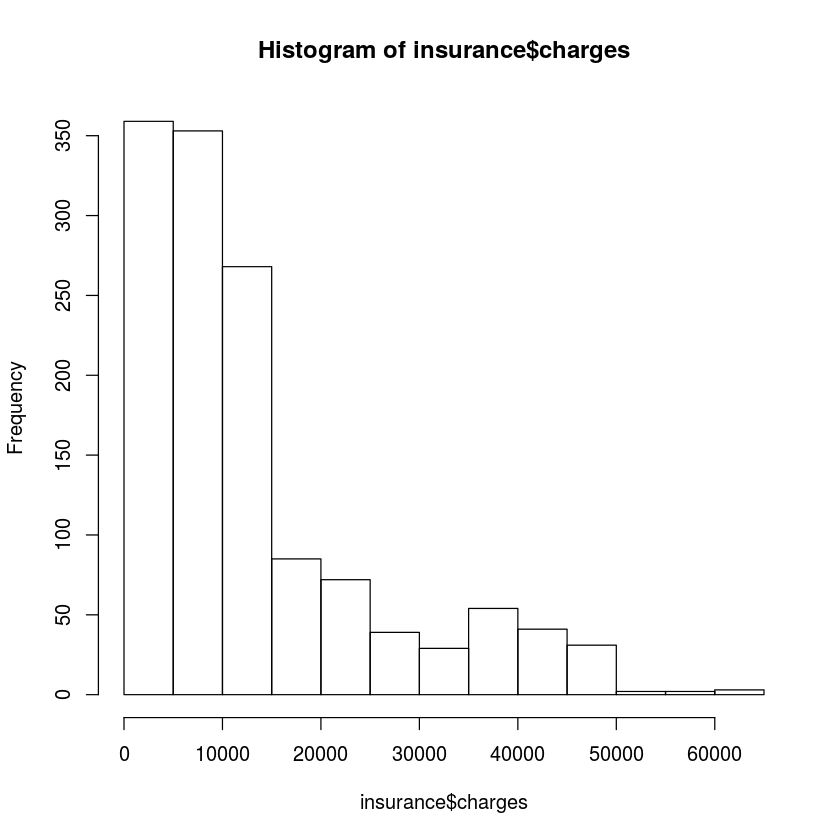

In [26]:
hist(insurance$charges)

### See above it doesn't follow normal distribution, hence use log transform to convert to normal distribution

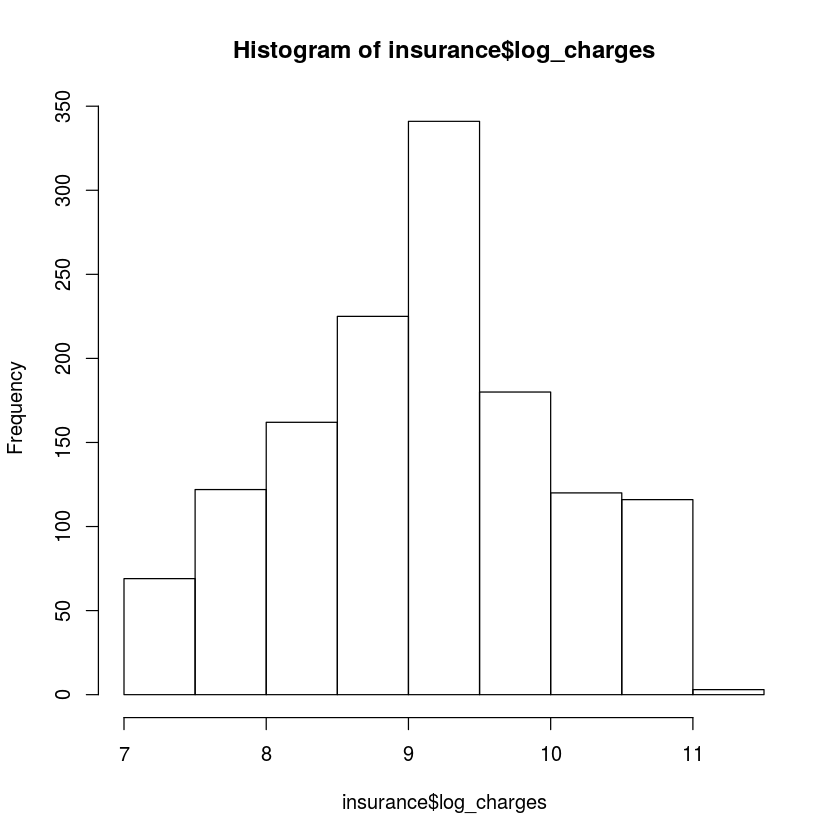

In [27]:
insurance$log_charges = log(insurance$charges)
hist(insurance$log_charges)

# Check if it follows lineraity b/w input and targe


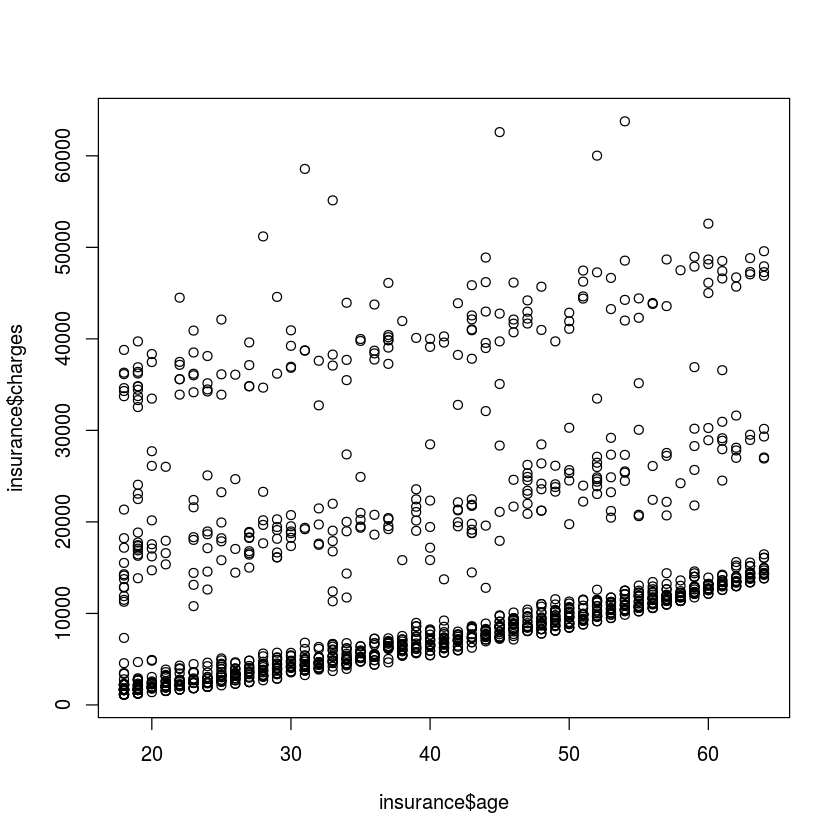

In [28]:
plot(insurance$age,insurance$charges)

# Co-relation Relation between input and target variable

In [29]:
cor(insurance$age,insurance$log_charges)

[1] 0.527834

# Multi colinearity check (input variables are co-related)

In [30]:
cor(insurance$age,insurance$bmi)

[1] 0.1092719

In [31]:
# ggplot()

# test and train split

In [32]:
set.seed(7)
ids = sample(nrow(insurance),nrow(insurance)*0.8)
train = insurance[ids,]
test = insurance[-ids,]


# Develop a model

In [33]:
lin_model = lm(log_charges ~ ., data=train) #'.' means include all the variables

In [34]:
summary (lin_model)


Call:
lm(formula = log_charges ~ ., data = train)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.1818 -0.1228  0.0228  0.1185  1.0685 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)      7.665e+00  5.909e-02 129.708  < 2e-16 ***
age              2.102e-02  7.692e-04  27.326  < 2e-16 ***
sexmale         -6.377e-02  1.863e-02  -3.423 0.000643 ***
bmi             -4.517e-03  1.717e-03  -2.631 0.008641 ** 
children         8.121e-02  7.757e-03  10.469  < 2e-16 ***
smokeryes        2.994e-01  4.331e-02   6.912 8.21e-12 ***
regionnorthwest -4.680e-02  2.670e-02  -1.753 0.079940 .  
regionsoutheast -1.201e-01  2.708e-02  -4.435 1.02e-05 ***
regionsouthwest -8.375e-02  2.688e-02  -3.115 0.001887 ** 
charges          5.248e-05  1.533e-06  34.226  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.3031 on 1060 degrees of freedom
Multiple R-squared:  0.8915,	Adjusted R-squared:  0.8906 
F-stat

In [35]:
# Test model

In [36]:
test$pred = predict(lin_model, newdata=test)
test[0:10,]

,age,sex,bmi,children,smoker,region,charges,log_charges,pred
1,19,female,27.900,0,yes,southwest,16884.924,9.734176,9.039722
6,31,female,25.740,0,no,southeast,3756.622,8.231275,8.277016
9,37,male,29.830,2,no,northeast,6406.411,8.765054,8.742437
13,23,male,34.400,0,no,southwest,1826.843,7.510345,7.941009
15,27,male,42.130,0,yes,southeast,39611.758,10.586881,10.236250
18,23,male,23.845,0,no,northeast,2395.172,7.781210,8.102263
21,60,female,36.005,0,no,northeast,13228.847,9.490155,9.457400
23,18,male,34.100,0,no,southeast,1137.011,7.036158,7.764749
27,63,female,23.085,0,no,northeast,14451.835,9.578577,9.643000
38,26,male,20.800,0,no,southwest,2302.300,7.741664,8.090450


In [37]:
# RMSE

# Diagonsis

Check for auto correlation and multi-colinearity

In [38]:
fit = lm(log_charges ~., data = train)
summary (fit)


Call:
lm(formula = log_charges ~ ., data = train)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.1818 -0.1228  0.0228  0.1185  1.0685 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)      7.665e+00  5.909e-02 129.708  < 2e-16 ***
age              2.102e-02  7.692e-04  27.326  < 2e-16 ***
sexmale         -6.377e-02  1.863e-02  -3.423 0.000643 ***
bmi             -4.517e-03  1.717e-03  -2.631 0.008641 ** 
children         8.121e-02  7.757e-03  10.469  < 2e-16 ***
smokeryes        2.994e-01  4.331e-02   6.912 8.21e-12 ***
regionnorthwest -4.680e-02  2.670e-02  -1.753 0.079940 .  
regionsoutheast -1.201e-01  2.708e-02  -4.435 1.02e-05 ***
regionsouthwest -8.375e-02  2.688e-02  -3.115 0.001887 ** 
charges          5.248e-05  1.533e-06  34.226  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.3031 on 1060 degrees of freedom
Multiple R-squared:  0.8915,	Adjusted R-squared:  0.8906 
F-stat

In [39]:
names(fit)

[1] "coefficients"  "residuals"     "effects"       "rank"         
 [5] "fitted.values" "assign"        "qr"            "df.residual"  
 [9] "contrasts"     "xlevels"       "call"          "terms"        
[13] "model"

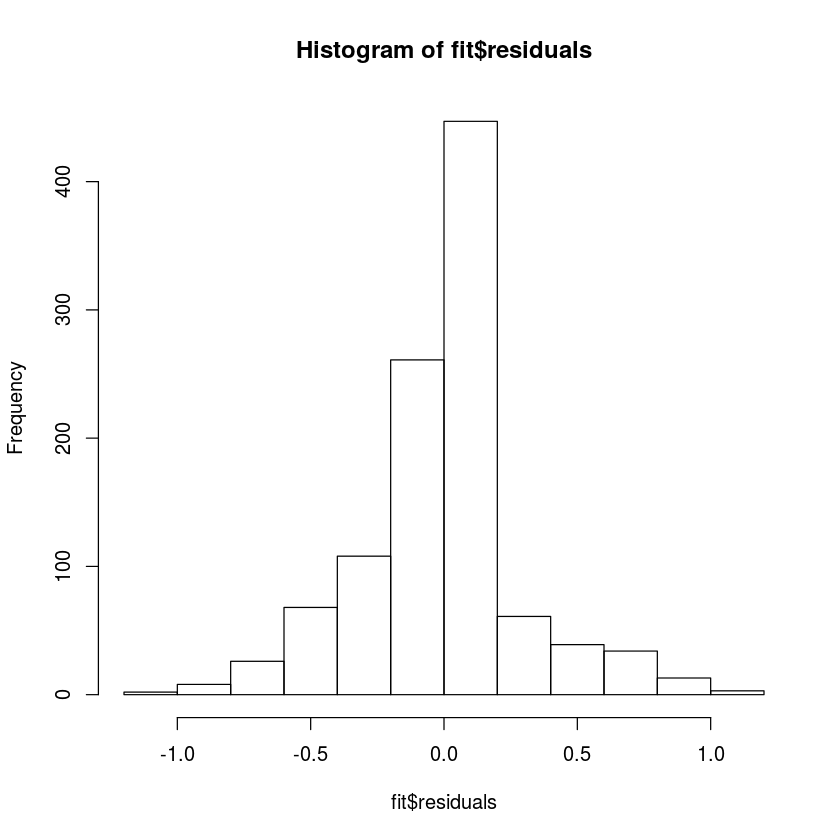

In [40]:
# check for auto correlation aand heteroscedasticity
hist(fit$residuals)

In [41]:
# check for auto correlation and heteroscedasticity
head(fit$residuals)

1324         532         155          94         326        1056 
-0.32095719 -0.01158795  0.02163286  0.05756479  0.07970768  0.12685274

In [42]:
fit$coefficients

(Intercept)             age         sexmale             bmi        children 
   7.664583e+00    2.101971e-02   -6.376988e-02   -4.516869e-03    8.120898e-02 
      smokeryes regionnorthwest regionsoutheast regionsouthwest         charges 
   2.993979e-01   -4.680124e-02   -1.200650e-01   -8.375206e-02    5.248107e-05

In [46]:
library(MASS) #need to calculate standard residuals
residuals1 = stdres(fit) #standardized residuals
summary (residuals1)

     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
-3.946000 -0.406800  0.075420  0.000063  0.392600  3.557000 

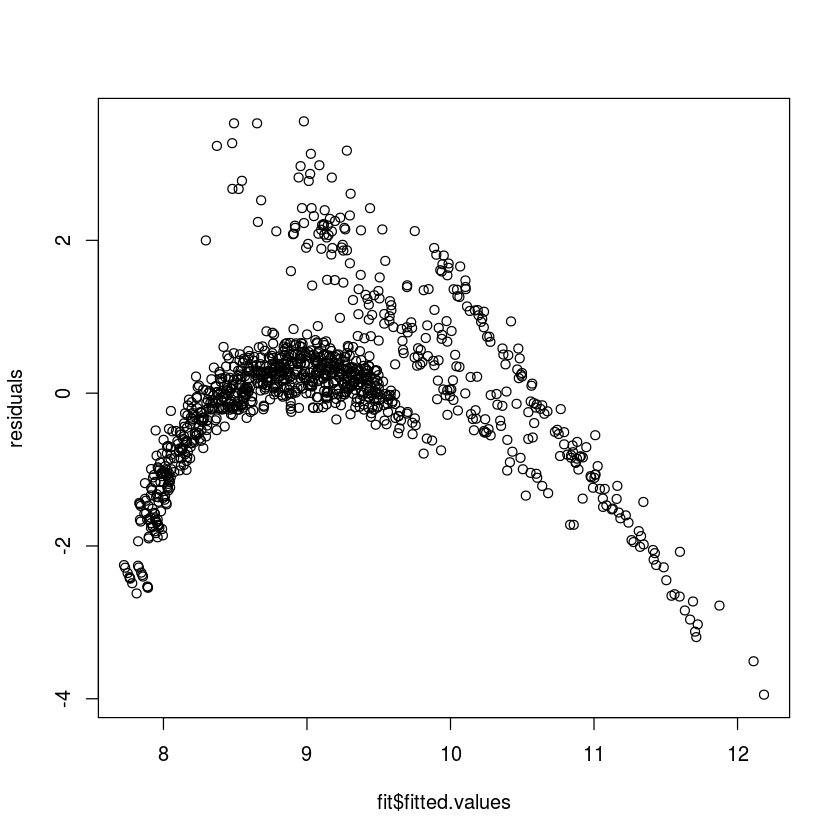

In [50]:
#Check for heteroscedasticity
plot(fit$fitted.values,residuals)
#See there is a problem w.r.t auto-correlation and heteroscedasticity

In [52]:
durbinWatsonTest(fit) # check for auto co-relation
# if p-value is less than 0.05 reject null hypothesis 

ERROR: Error in eval(expr, envir, enclos): could not find function "durbinWatsonTest"


In [53]:
outlierTest(fit)

ERROR: Error in eval(expr, envir, enclos): could not find function "outlierTest"


In [57]:
#leverages
cd = cooks.distance(fit)
cutoff = 4 /(nrow(train) - length(fit$coefficients))
cutoff

[1] 0.003773585

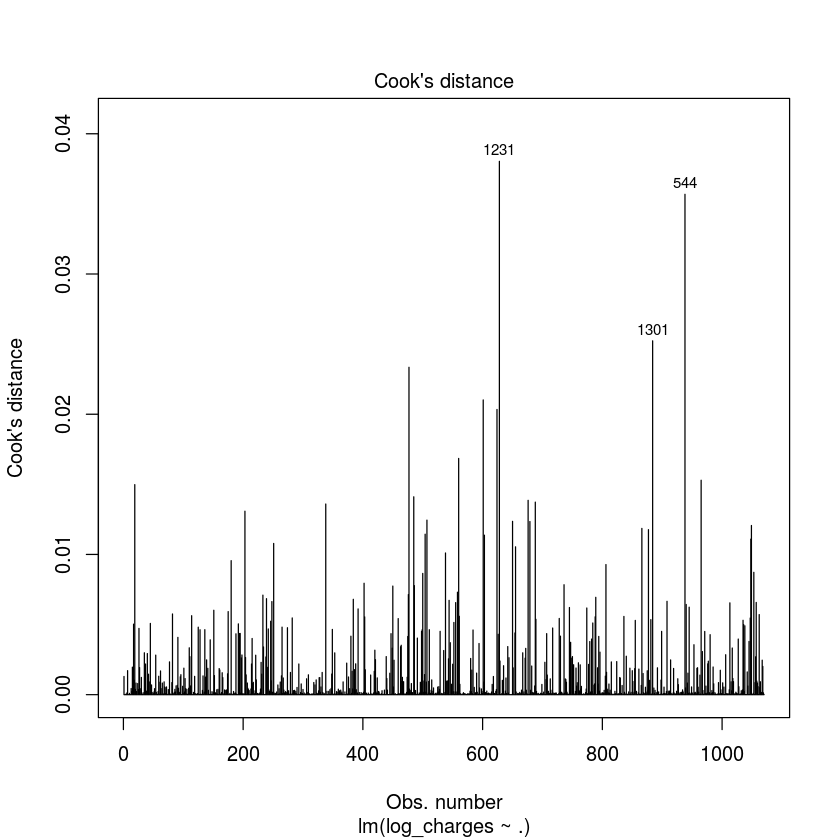

In [58]:
plot(fit,which=4,cook.levels = cutoff)

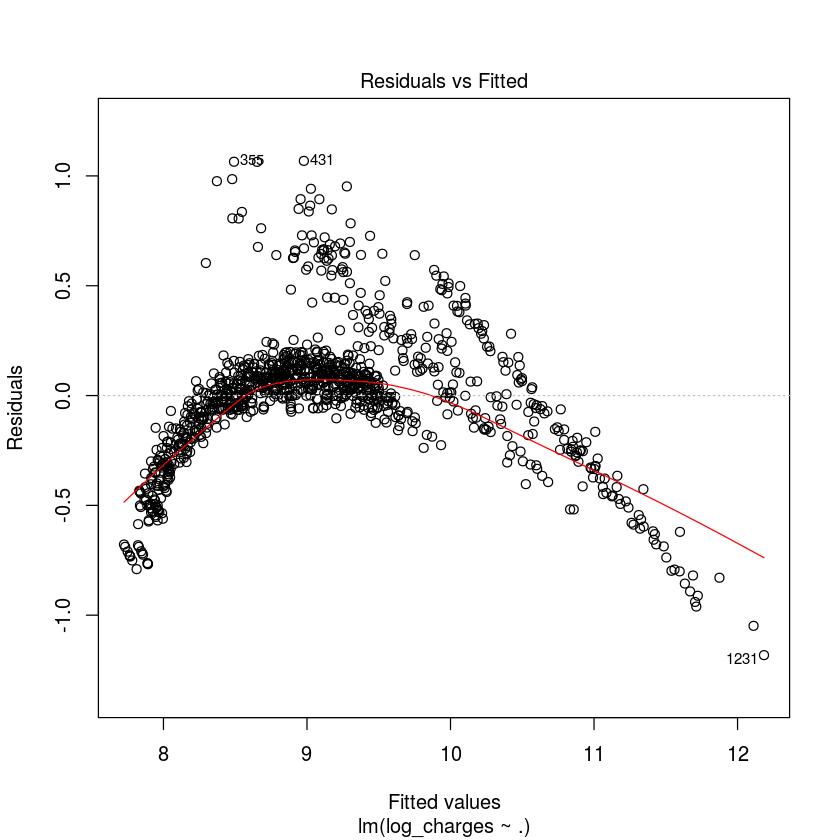

In [59]:
plot(fit, which=1) # it shows both issue with auto-correlation and heter

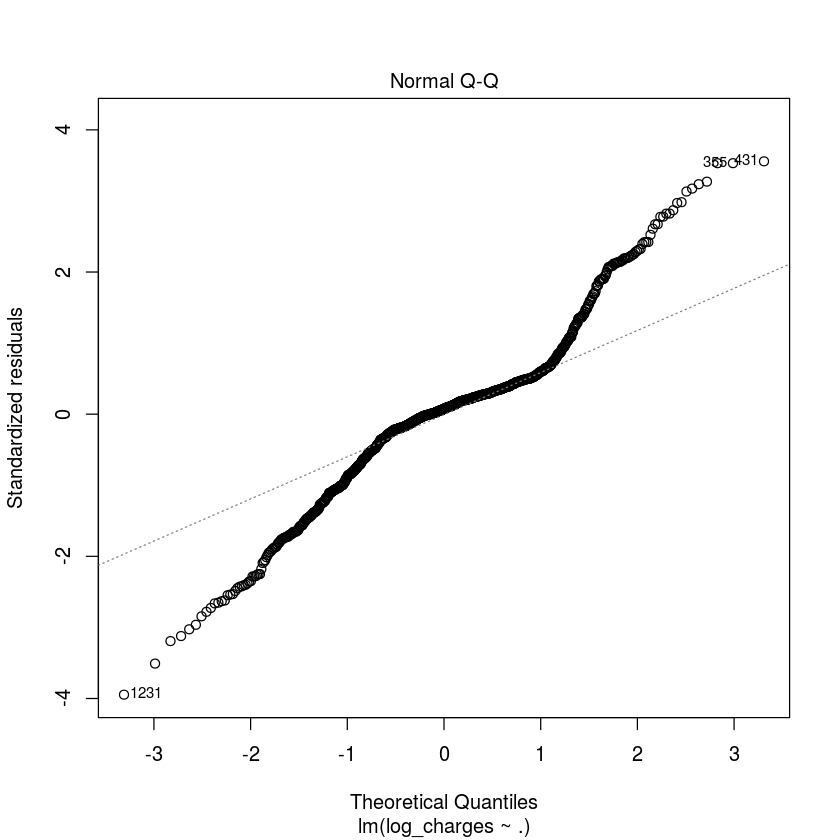

In [61]:
# if errors are following normal distribution then all circles should be on dotted line
plot(fit, which=2) # see it shows both issue with auto-correlation and heter

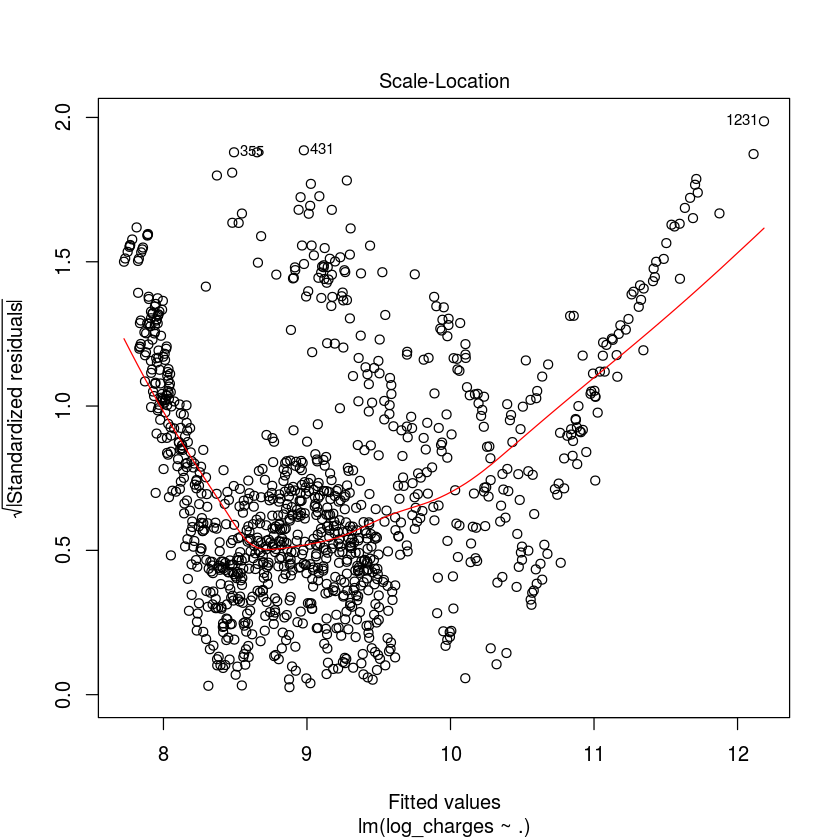

In [62]:
plot(fit, which=3) # auto -corelation plot with stan residuals

Warning message in plot.window(...):
“"levels" is not a graphical parameter”Warning message in plot.xy(xy, type, ...):
“"levels" is not a graphical parameter”Warning message in axis(side = side, at = at, labels = labels, ...):
“"levels" is not a graphical parameter”Warning message in axis(side = side, at = at, labels = labels, ...):
“"levels" is not a graphical parameter”Warning message in box(...):
“"levels" is not a graphical parameter”Warning message in title(...):
“"levels" is not a graphical parameter”Warning message in title(sub = sub.caption, ...):
“"levels" is not a graphical parameter”

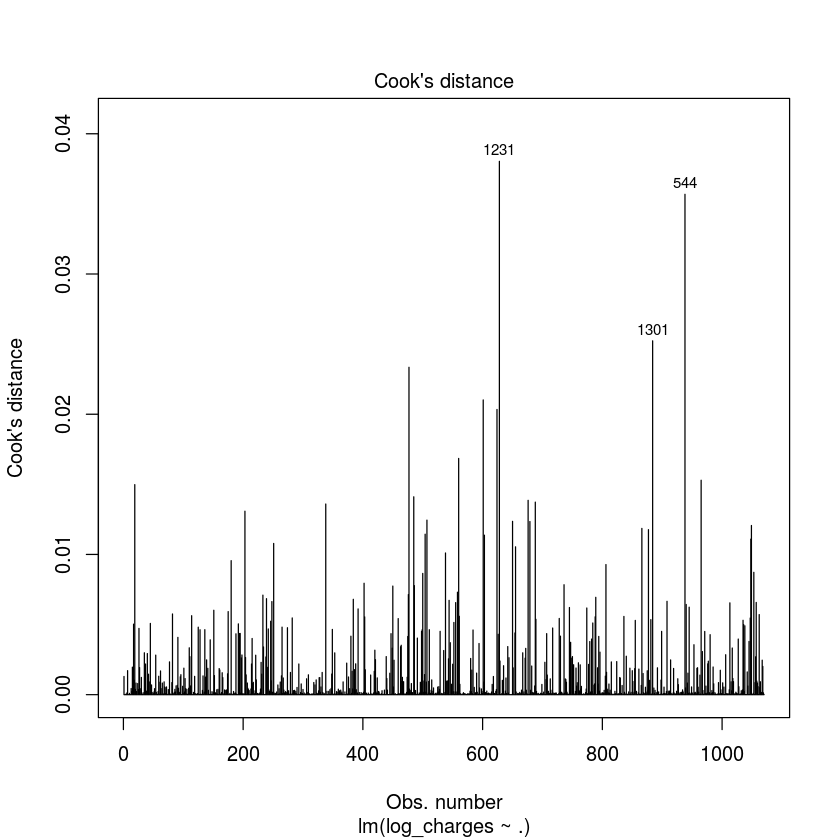

In [63]:
plot(fit, which=4,levels=cutoff) # Leverages using cooks

In [67]:
# removing outliers and leverages
train = train [-c(431,220,1028,1040,103,527,1020),]
fit = lm(log_charges ~.,data=train)
summary(fit)


Call:
lm(formula = log_charges ~ ., data = train)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.16858 -0.11849  0.02433  0.12012  1.07432 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)      7.662e+00  6.016e-02 127.363  < 2e-16 ***
age              2.097e-02  7.823e-04  26.803  < 2e-16 ***
sexmale         -6.312e-02  1.893e-02  -3.335 0.000884 ***
bmi             -4.244e-03  1.765e-03  -2.404 0.016394 *  
children         8.076e-02  7.901e-03  10.222  < 2e-16 ***
smokeryes        3.129e-01  4.407e-02   7.100 2.32e-12 ***
regionnorthwest -4.150e-02  2.718e-02  -1.527 0.127128    
regionsoutheast -1.186e-01  2.761e-02  -4.295 1.91e-05 ***
regionsouthwest -8.199e-02  2.733e-02  -3.000 0.002763 ** 
charges          5.189e-05  1.557e-06  33.319  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.3038 on 1032 degrees of freedom
Multiple R-squared:  0.8911,	Adjusted R-squared:  0.89

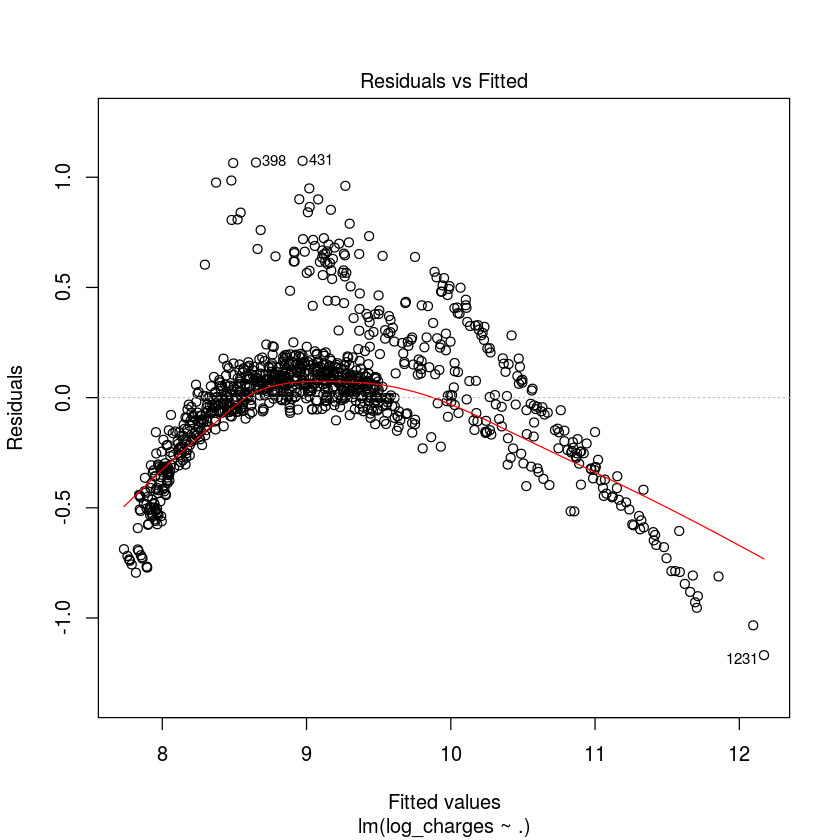

In [68]:
plot(fit,which=1)

In [75]:
#Explore relation between target and input

install.packages('ggplot')


Warning message:
“package ‘ggplot’ is not available (for R version 3.3.2)”

In [ ]:
library(ggplot)
ggplot(train, aes(bmi, log_charges)) + geom_point()

train$age_bmi = sqrt(train$bmi/train$age)
fit = lm(log_charges ~ . ~bmi ~age, data=train)

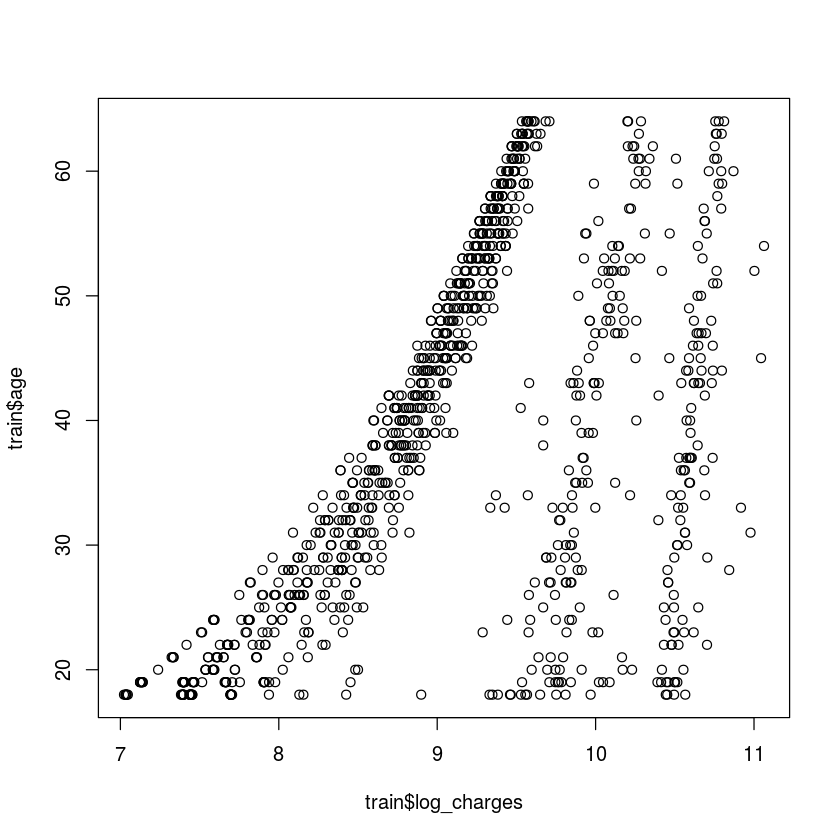

In [79]:
plot(train$log_charges,train$age)